In [1]:
import sys, cv2, glob, os, time
import pandas as pd  
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle  

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
!pip install lime

Fold: 0
0.88125
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        80
           1       0.84      0.94      0.89        80

    accuracy                           0.88       160
   macro avg       0.89      0.88      0.88       160
weighted avg       0.89      0.88      0.88       160



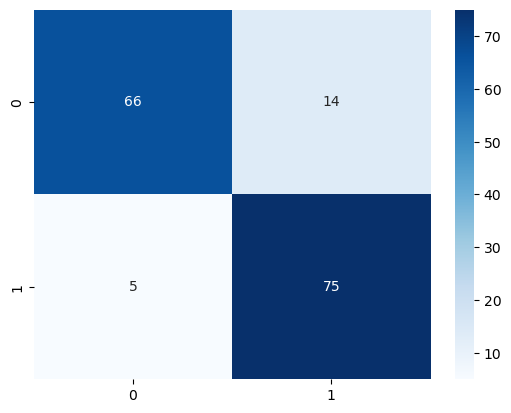

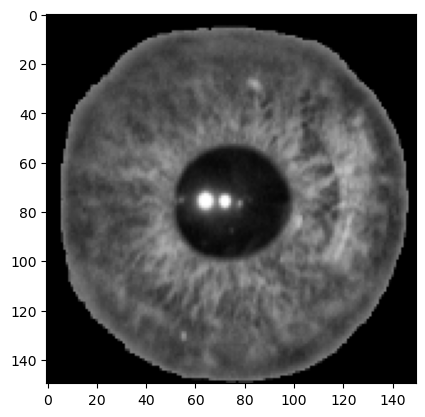

  0%|          | 0/1000 [00:00<?, ?it/s]

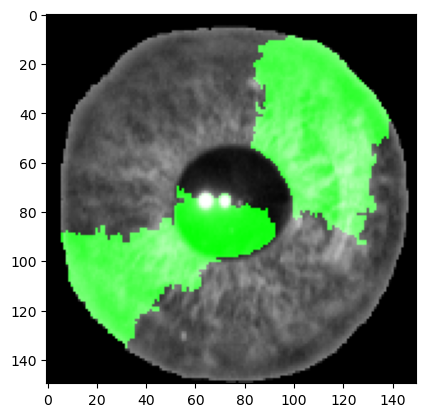

Fold: 1
0.925
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        80
           1       0.90      0.95      0.93        80

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.92       160
weighted avg       0.93      0.93      0.92       160



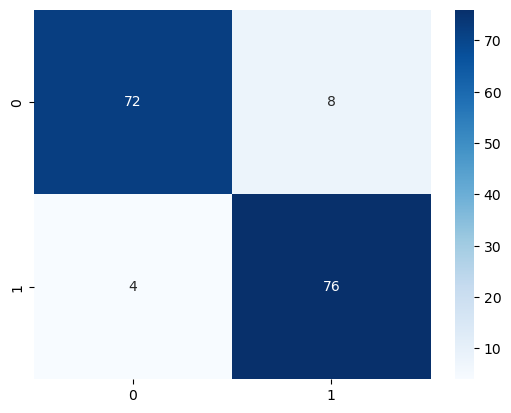

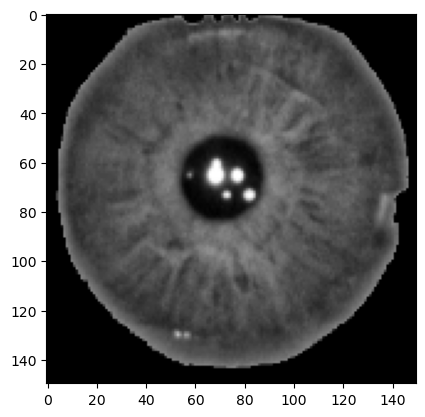

  0%|          | 0/1000 [00:00<?, ?it/s]

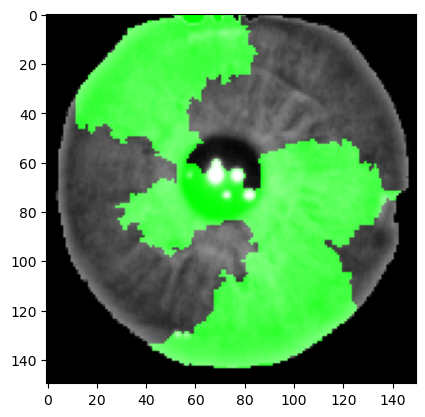

Fold: 2
0.9125
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        80
           1       0.91      0.91      0.91        80

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160



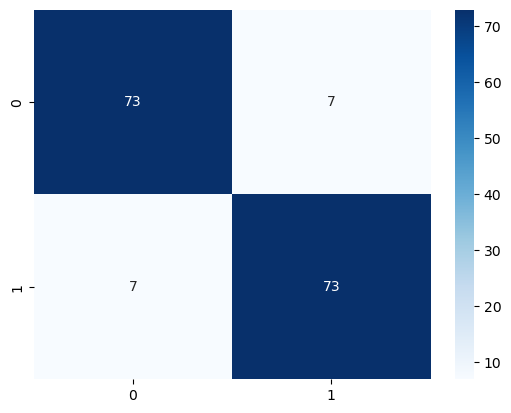

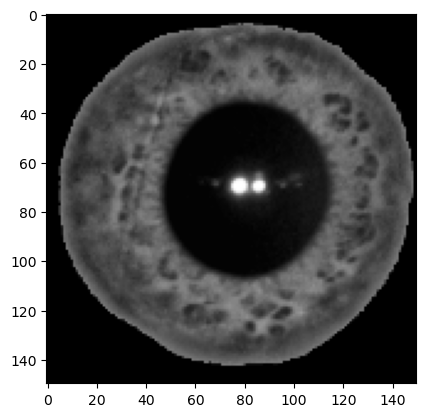

  0%|          | 0/1000 [00:00<?, ?it/s]

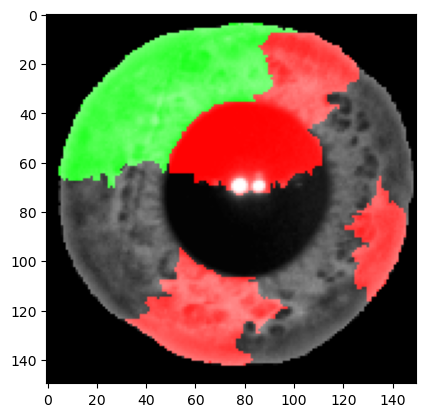

Fold: 3
0.94375
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        80
           1       0.97      0.91      0.94        80

    accuracy                           0.94       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.94      0.94       160



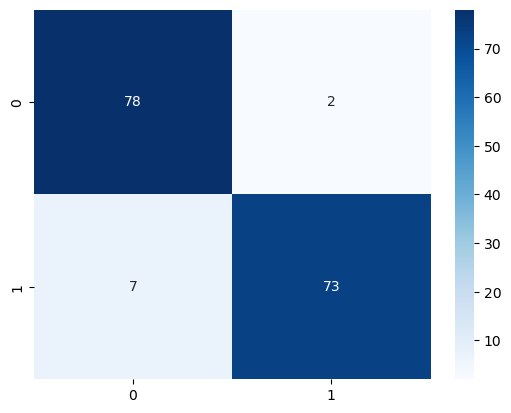

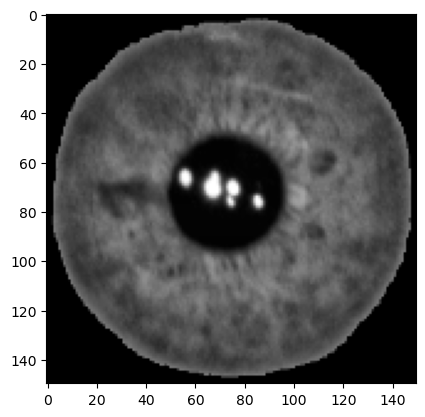

  0%|          | 0/1000 [00:00<?, ?it/s]

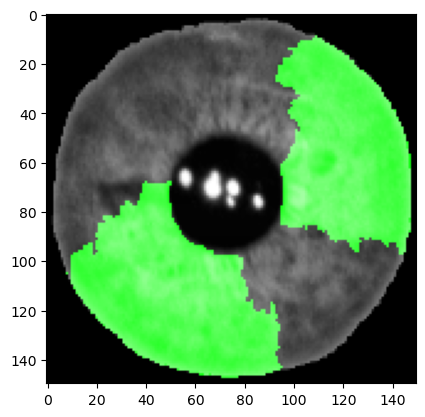

Fold: 4
0.9375
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        80
           1       0.99      0.89      0.93        80

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160



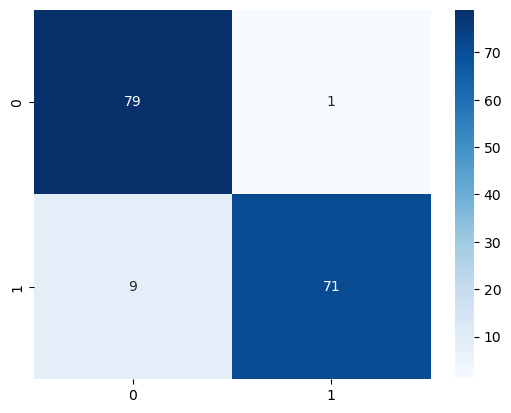

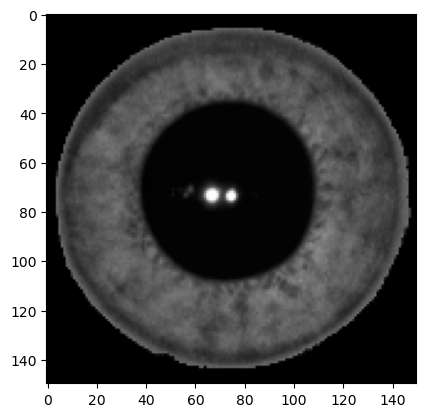

  0%|          | 0/1000 [00:00<?, ?it/s]

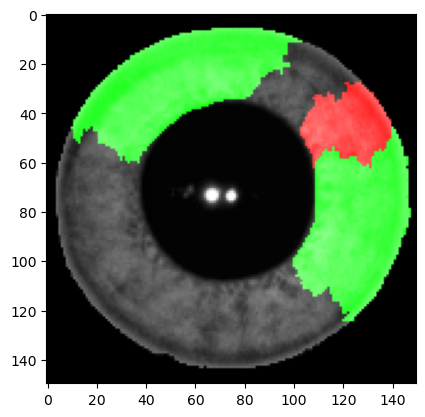

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from lime import lime_image
import lime

def get_images(directory):
    Images = []
    Labels = []  
    for labels in os.listdir(directory):   
        for image_file in os.listdir(directory+labels): 
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150)) 
            Images.append(image)
            Labels.append(labels)
    return shuffle(Images,Labels,random_state=817328462)

Images, Labels = get_images("Data\\IrisCrop\\")
Images = np.array(Images)
Labels = np.array(Labels)

le = LabelEncoder()
Labels = le.fit_transform(Labels)

n_samples = len(Images)
data_imagesRGB = Images.reshape((n_samples, -1))

# Use Stratified K-fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(skf.split(data_imagesRGB, Labels)):
    X_train, X_test = data_imagesRGB[train_index], data_imagesRGB[test_index]
    y_train, y_test = Labels[train_index], Labels[test_index]
    
    svm = SVC(kernel='poly', C=10.0, random_state=42, probability=True)
    svm.fit(X_train,y_train)
    y_pred=svm.predict(X_test)

    print("Fold:", fold)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    cf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    plt.show()

    # Lime code for explanations
    explainer = lime_image.LimeImageExplainer()

    def predict_fn(images):
        reshaped_images = images.reshape(images.shape[0], -1)
        return svm.predict_proba(reshaped_images)

    # choose a specific image to explain
    i = 5 # select a specific image index
    if i < len(X_test):  # Protect against index out-of-range errors
        image = X_test[i].reshape((150,150,3))
        plt.imshow(image)
        plt.show()

        explanation = explainer.explain_instance(image, predict_fn, top_labels=2, hide_color=0, num_samples=1000)
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

        plt.imshow(temp)
        plt.show()


# Label

In [5]:
from collections import Counter
Counter(Labels)

Counter({1: 800, 0: 800})

In [6]:
n_samples = len(Images)
data_imagesRGB = Images.reshape((n_samples, -1))

# Machine Learning Model

In [7]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_imagesRGB, Labels, test_size=0.15, shuffle=True)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=100)
dt.fit(X_train,y_train)
yhat_classes = dt.predict(X_test)
print(classification_report(y_test, yhat_classes))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       122
           1       0.93      0.97      0.95       118

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240

[[46 76]
 [71 47]]


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       122
           1       0.81      0.77      0.79       118

    accuracy                           0.80       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.80      0.80      0.80       240

[[46 76]
 [71 47]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=3.0, random_state=42)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

SVC
0.9583333333333334
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       122
           1       0.95      0.97      0.96       118

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240

[[116   6]
 [  4 114]]


# K Fold Cross Validations using Original

In [12]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# Step 1: Create the SVM classifier
svm_classifier = svm.SVC(kernel='linear',C=30.0)  # You can choose different kernels as well
# Step 2: Perform K-Fold Cross-Validation
num_folds = 5  # Choose the number of folds (k)
# Initialize KFold cross-validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and get the accuracy scores
cv_scores = cross_val_score(svm_classifier, data_imagesRGB, Labels, cv=kfold)
# Print the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", cv_scores)
# Calculate the average accuracy over all folds
average_accuracy = np.mean(cv_scores)
print("Average Accuracy:", average_accuracy)

Accuracy Scores for Each Fold: [0.9375  0.96875 0.95625 0.9125  0.96875]
Average Accuracy: 0.9487500000000001


In [13]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English


ModuleNotFoundError: No module named 'keras_metrics'

In [ ]:
from sklearn.preprocessing import LabelEncoder

target=Labels.tolist()
label_encoder = LabelEncoder()
Y = np.array(label_encoder.fit_transform(Labels))
Y1 = pd.get_dummies(Y).values

# CNN

In [ ]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Images, Y1, test_size=0.15, shuffle=True)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Prepare the Data
# Assuming you have images as input data and corresponding labels
# Replace 'X_train', 'y_train', 'X_test', and 'y_test' with your data

# Step 2: Build the CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Step 3: Train the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



In [ ]:

X_valid =X_test
Y_valid = y_test

In [ ]:

model.evaluate(X_valid,Y_valid)

# CNN Results

In [ ]:
predict_x=model.predict(X_valid) 
classes_x=np.argmax(predict_x,axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,classes_x))
print(confusion_matrix(rounded_labels,classes_x))

# Feature Extraction Through CNN

In [ ]:
# Instantiate a new Keras Model object, 'feature_extractor'
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.layers[-3].output)

# Use 'feature_extractor' to transform the input 'Images' into a set of features. 
extracted_features = feature_extractor.predict(Images)


In [ ]:
featureI=pd.DataFrame(extracted_features)
featureI['target']=Y
featureI.to_csv('Iris.csv')

# SVM with CNN features

In [ ]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureI, Y, test_size=0.15, shuffle=True)

In [ ]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=3.0, random_state=42)

# Call the 'fit' method of the 'svm' object (an instance of sklearn's SVC class) to train the SVM model.
# The training data (features and corresponding labels) is given by 'X_train' and 'y_train', respectively.
# 'X_train' is a 2D array-like structure where each row is a data instance and each column is a feature.
# 'y_train' is a 1D array-like structure where each element is the label (or target) for the corresponding row in 'X_train'.
# The 'fit' method adjusts the model's parameters based on the training data, so that the model can make accurate predictions.
# After this line of code is executed, the 'svm' object represents a trained model.
svm.fit(X_train, y_train)

y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# K Fold Cross Validations using CNN

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# Step 1: Create the SVM classifier
svm_classifier = svm.SVC(kernel='linear',C=30.0)  # You can choose different kernels as well
# Step 2: Perform K-Fold Cross-Validation
num_folds = 5  # Choose the number of folds (k)
# Initialize KFold cross-validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and get the accuracy scores
cv_scores = cross_val_score(svm_classifier, featureI, Y, cv=kfold)
# Print the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", cv_scores)
# Calculate the average accuracy over all folds
average_accuracy = np.mean(cv_scores)
print("Average Accuracy:", average_accuracy)